      Analyse der einseitigen Grenzwerte bei x = 0

--- Analyse für f(x) = cot(x) ---
  lim (x -> 0⁻) = -oo
  lim (x -> 0⁺) = oo

--- Analyse für f(x) = 1/x ---
  lim (x -> 0⁻) = -oo
  lim (x -> 0⁺) = oo

--- Analyse für f(x) = exp(1/x) ---
  lim (x -> 0⁻) = 0
  lim (x -> 0⁺) = oo

--- Analyse für f(x) = 1 / (1 + exp(-1/x)) ---
  lim (x -> 0⁻) = 0
  lim (x -> 0⁺) = 1


<lambdifygenerated-11>:2: RuntimeWarning: overflow encountered in exp
  return exp(x**(-1.0))
<lambdifygenerated-12>:2: RuntimeWarning: overflow encountered in exp
  return (1 + exp(-1/x))**(-1.0)


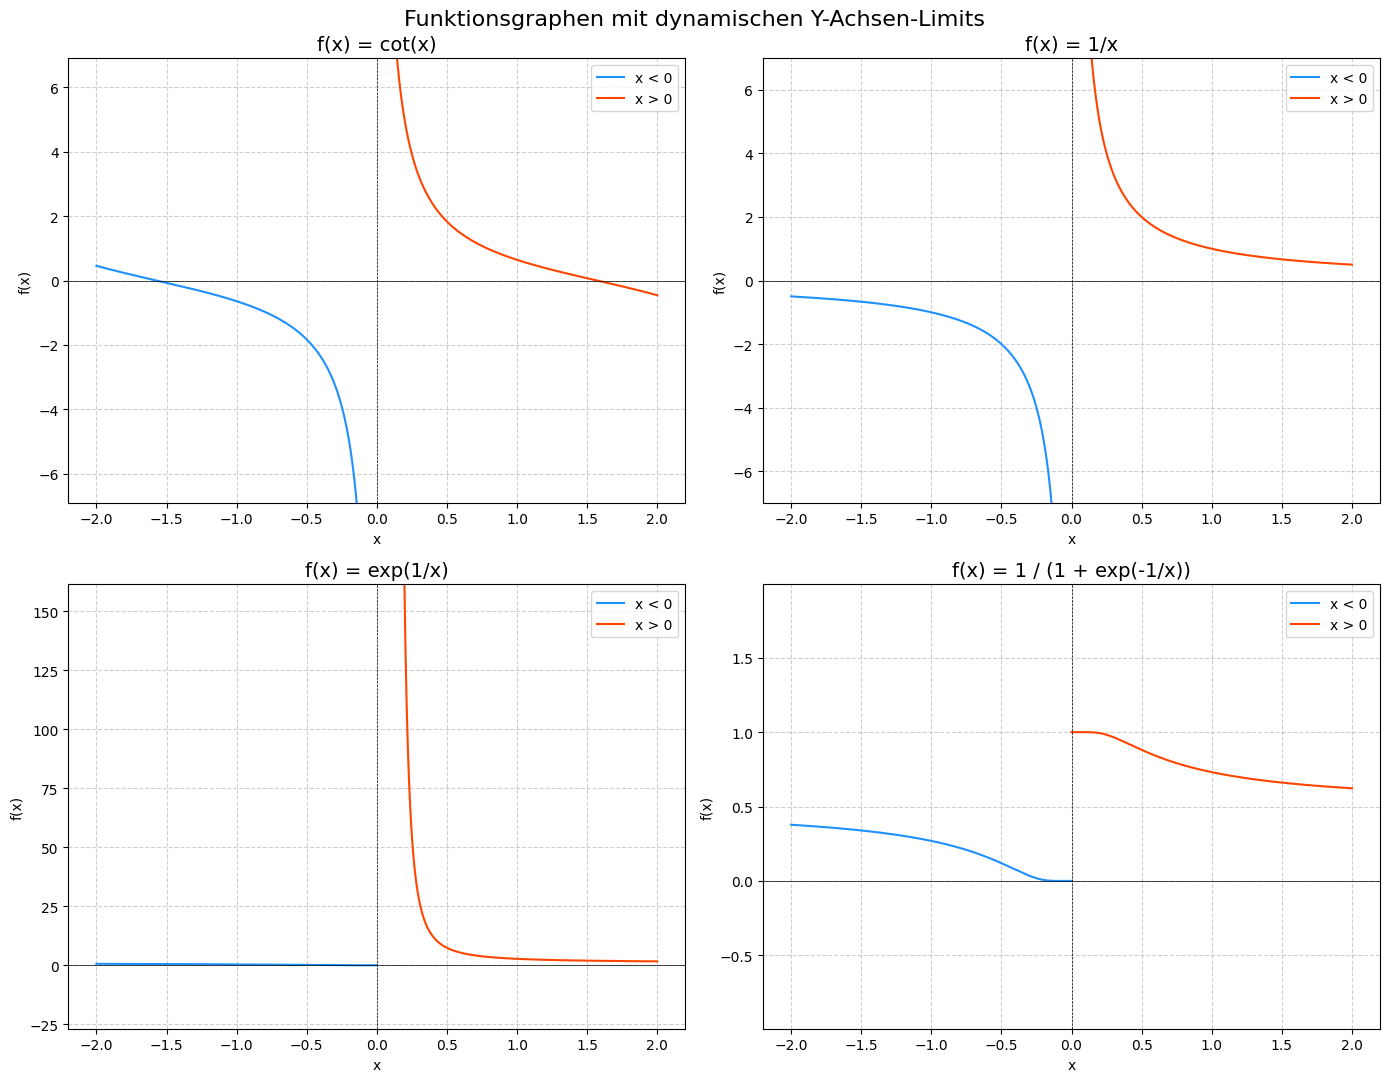

In [5]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def analysiere_und_plotte_funktionen(aufgaben, variable):
    """
    Analysiert eine Liste von Funktionen, berechnet deren einseitige Grenzwerte
    an der Stelle 0 und erstellt einen gemeinsamen Plot mit dynamischen y-Achsen-Limits.
    """
    fig, axes = plt.subplots(2, 2, figsize=(14, 11))
    flache_achsen = axes.flat

    print("="*50)
    print("      Analyse der einseitigen Grenzwerte bei x = 0")
    print("="*50)

    for ax, (titel, funktion) in zip(flache_achsen, aufgaben.items()):
        
        print(f"\n--- Analyse für f(x) = {titel} ---")

        # 1. Grenzwertberechnung
        limit_links = sp.limit(funktion, variable, 0, dir='-')
        limit_rechts = sp.limit(funktion, variable, 0, dir='+')
        
        print(f"  lim (x -> 0⁻) = {limit_links}")
        print(f"  lim (x -> 0⁺) = {limit_rechts}")
        
        # 2. Funktion für das Plotten vorbereiten
        
        # --- KORRIGIERTE STELLE ---
        # Die Module werden als eine Liste übergeben
        f_numerisch = sp.lambdify(variable, funktion, modules=['numpy', 'math'])
        # ---------------------------

        x_werte_links = np.linspace(-2.0, -1e-5, 500)
        x_werte_rechts = np.linspace(1e-5, 2.0, 500)
        
        y_werte_links = f_numerisch(x_werte_links)
        y_werte_rechts = f_numerisch(x_werte_rechts)

        # 3. Plotten
        ax.plot(x_werte_links, y_werte_links, color='dodgerblue', label='x < 0')
        ax.plot(x_werte_rechts, y_werte_rechts, color='orangered', label='x > 0')
        
        # Dynamische y-Limits
        alle_y_werte = np.concatenate([y_werte_links, y_werte_rechts])
        endliche_y_werte = alle_y_werte[np.isfinite(alle_y_werte)]
        
        if len(endliche_y_werte) > 0:
            min_y = np.percentile(endliche_y_werte, 5)
            max_y = np.percentile(endliche_y_werte, 95)
            puffer = (max_y - min_y) * 0.2
            if puffer < 1: puffer = 1
            ax.set_ylim(min_y - puffer, max_y + puffer)
        else:
            ax.set_ylim(-10, 10)

        ax.set_title(f"f(x) = {titel}", fontsize=14)
        ax.set_xlabel('x')
        ax.set_ylabel('f(x)')
        ax.grid(True, linestyle='--', alpha=0.6)
        ax.axhline(0, color='black', linewidth=0.5)
        ax.axvline(0, color='black', linewidth=0.5, linestyle='--')
        ax.legend()
        
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    fig.suptitle("Funktionsgraphen mit dynamischen Y-Achsen-Limits", fontsize=16)
    plt.show()

# =============================================================
# --- HAUPTPROGRAMM ---
# =============================================================
if __name__ == "__main__":
    
    x = sp.Symbol('x')

    aufgaben_dict = {
        'cot(x)': sp.cot(x),
        '1/x': 1/x,
        'exp(1/x)': sp.exp(1/x),
        '1 / (1 + exp(-1/x))': 1 / (1 + sp.exp(-1/x))
    }
    
    analysiere_und_plotte_funktionen(aufgaben_dict, x)